### Utilize a base de dados para as questões abaixo archive.ics.uci.edu/ml/datasets/iris.

In [1]:
import pandas as pd

data_iris = pd.read_csv("iris.csv")
x_iris    = data_iris.drop(['variety'], axis=1)
y_iris    = data_iris['variety']

In [2]:
x_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y_iris.head(data_iris)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: variety, dtype: object

### 1. Utilize apenas duas originais característcas da base de dados archive.ics.uci.edu/ml/datasets/iris para as questões abaixo.:

#### (a) (5 pontos) Mostre as cargas do primeiro componente.

In [6]:
df = x_iris.drop(['sepal_length', 'sepal_width'], axis=1)
df.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [29]:
from sklearn.decomposition import PCA

pcs = PCA(n_components=1)
pcs.fit(df)
loadings = pd.DataFrame(pcs.components_, columns=df.columns) 
loadings

,petal_length,petal_width
0,0.921547,0.388267


<AxesSubplot:>

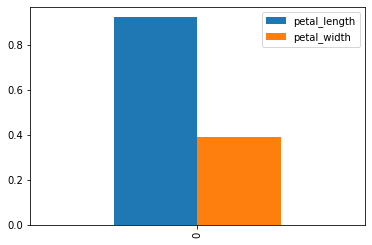

In [53]:
loadings.plot.bar()


#### (b) (10 pontos) Mostre a linha que representa o primeiro componente em um diagrama de dispersão da base.

In [74]:
import numpy as np

def abline(slope, ax):
    x_vals = np.array(ax.get_xlim())
    return (x_vals, slope * x_vals)

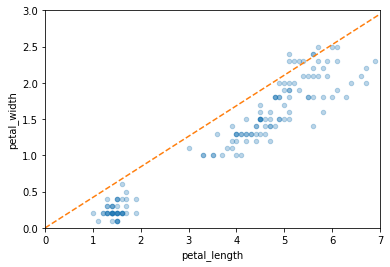

In [75]:
ax = df.plot.scatter(x='petal_length', y='petal_width', alpha=0.3)
ax.set_xlim(0, 7)
ax.set_ylim(0,3)
ax.plot(*abline(loadings.loc[0, 'petal_width'] / loadings.loc[0, 'petal_length'], ax), '--', color='C1')

#### (c) (10 pontos) Compare o histograma dos dados originais com os dados projetados no primeiro componente.

<AxesSubplot:ylabel='Frequency'>

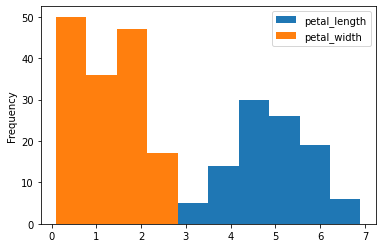

In [82]:
df.plot.hist()

### 2. Utilizando a base Wine archive.ics.uci.edu/ml/datasets/Wine:

In [144]:
wine = pd.read_csv('wine.csv').drop(['Class'], axis=1)
wine.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### (a) (5 pontos) Gere o gráco de barras com a variância de cada componente em ordem (da maior a para a menor).

Text(0.5, 0, 'Component')

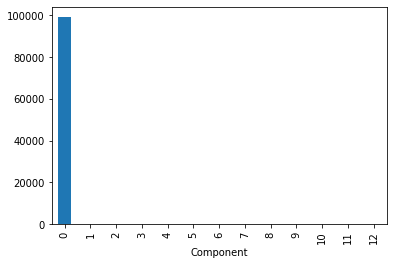

In [145]:
pca = PCA()
pca.fit(wine)
variancia = pd.DataFrame(pca.explained_variance_)
ax = variancia.plot.bar(legend=False)
ax.set_xlabel("Component")

#### (b) (5 pontos) Refaça o gráco ignorando os dois primeiros componentes.

Text(0.5, 0, 'Component')

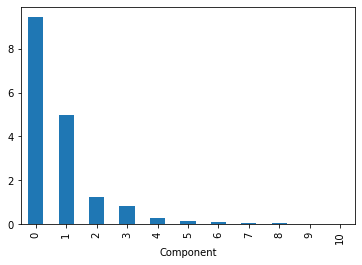

In [146]:
variancia = pd.DataFrame(pca.explained_variance_[2:])
ax = variancia.plot.bar(legend=False)
ax.set_xlabel("Component")

#### (c) (5 pontos) Quantos componentes explicam 90% da variância dos dados?

In [147]:
for i in pca.explained_variance_ratio_:
    print(i * 100)

99.80912304918974
0.17359156247057514
0.009495895755146111
0.005021735618215133
0.0012363684687897911
0.0008462130335248517
0.0002806814557136475
0.0001523080532847521
0.00011278304393008556
7.214158108199812e-05
3.780602665125048e-05
2.1201375460769076e-05
8.253927880930374e-06


Apenas 1 componente explica 90% da variancia (o primeiro componente)

#### (d) (10 pontos) Extraia as duas duas caracaterísticas da base utilizando os dois primeiros compomentes e mostre a base em um diagrama de dispersão. Lembre-se de destacar cada classe com cores (ou símbolos) diferentes.

<AxesSubplot:xlabel='C1', ylabel='C2'>

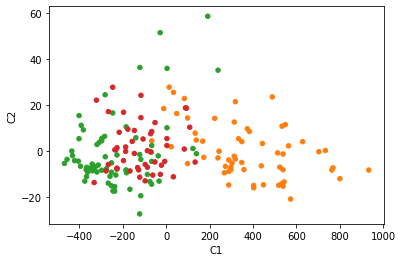

In [148]:
pca = PCA(n_components=2)
df_wine = pd.DataFrame(pca.fit_transform(wine), columns=['C1', 'C2'])
df_wine['class'] = pd.read_csv('wine.csv')['Class']
colors  = [f'C{c}' for c in df_wine['class']]
df_wine.plot.scatter('C1', 'C2', c=colors)

### 3. Refaça a questão anterior após padronizar cada característica da base para o intervalo [0,1].Compare com os resultados da questão anterior.
Dica: sklearn.preprocessing.StandardScaler

In [149]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
 
df_scaled = scaler.fit_transform(wine.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=wine.columns)
df_scaled.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


Text(0.5, 0, 'Component')

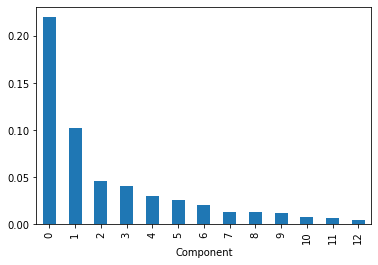

In [150]:
pca_sc = PCA()
pca_sc.fit(df_scaled)
variancia = pd.DataFrame(pca_sc.explained_variance_)
ax = variancia.plot.bar(legend=False)
ax.set_xlabel("Component")

Text(0.5, 0, 'Component')

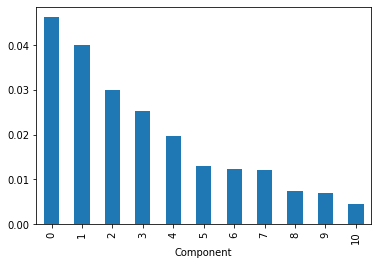

In [152]:
variancia = pd.DataFrame(pca_sc.explained_variance_[2:])
ax = variancia.plot.bar(legend=False)
ax.set_xlabel("Component")

In [153]:
max = 90
n = 1
sum = 0

for i in pca_sc.explained_variance_ratio_:
    print(i * 100)
    if(sum < max):
        n += 1
        sum += i * 100

print(n, 'primeiros componentes explicam', sum,'% da variancia')

40.749484555191394
18.970351783649093
8.561670620841728
7.426677803340599
5.565301095610771
4.658837190530753
3.6639289054138353
2.408789297375154
2.2743705254245397
2.250964564559721
1.3812924741667412
1.2732359215171136
0.8150952623785672
9 primeiros componentes explicam 92.00504125195333 % da variancia


<AxesSubplot:xlabel='C1', ylabel='C2'>

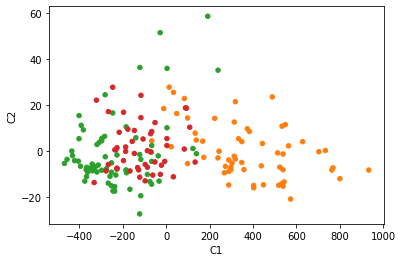

In [154]:
pca_sc = PCA(n_components=2)
df_wine_scaled = pd.DataFrame(pca_sc.fit_transform(df_scaled), columns=['C1', 'C2'])
df_wine_scaled['class'] = pd.read_csv('wine.csv')['Class']
colors  = [f'C{c}' for c in df_wine['class']]
df_wine.plot.scatter('C1', 'C2', c=colors)

### 4. Analise as cargas dos componentes, compente quais variáveis inuencial mais cada componente.Observe se a inuência é toda de um sinal ou existe contrate de variáveis. Faça a análise tanto para os dados originais como para os dados padronizados. Utilize a base Wine archive.ics.uci.edu/ml/datasets/Wine.

#### (a) (5 pontos) Para o primeiro componente

In [184]:
pca = PCA()
pca.fit(wine)

PCA()

In [185]:
pca_sc = PCA()
df_wine_scaled = pd.DataFrame(pca_sc.fit_transform(df_scaled), columns=df_scaled.columns)

In [191]:
loadings_1 = pd.DataFrame(pca.components_, columns=wine.columns) 
loadings_2 = pd.DataFrame(pca_sc.components_, columns=df_wine_scaled.columns) 

<AxesSubplot:>

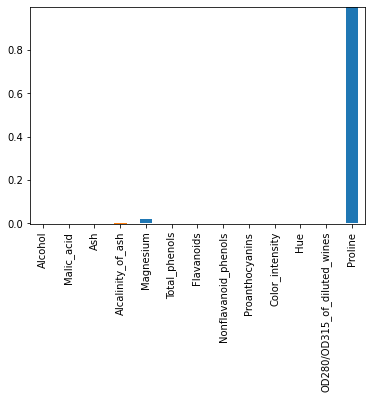

In [233]:
colors = ['C0' if l > 0 else 'C1' for l in loadings_1.loc[0]]
loadings_1.loc[0].plot.bar(color=colors, ylim=(loadings_1.loc[0].min(), loadings_1.loc[0].max()))

<AxesSubplot:>

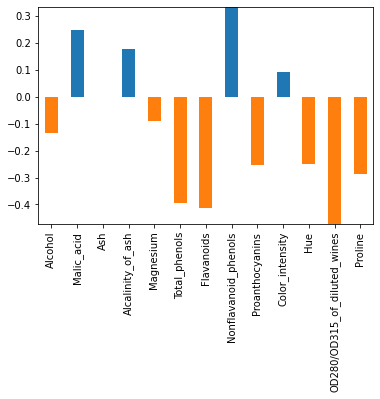

In [232]:
colors_2 = ['C0' if l > 0 else 'C1' for l in loadings_2.loc[0]]
loadings_2.loc[0].plot.bar(color=colors_2, ylim=(loadings_2.loc[0].min(), loadings_2.loc[0].max()))

#### (b) (5 pontos) Para o segundo componente

<AxesSubplot:>

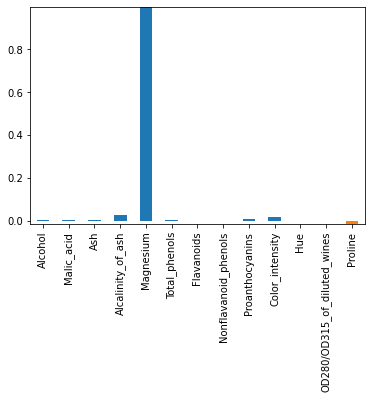

In [234]:
colors = ['C0' if l > 0 else 'C1' for l in loadings_1.loc[1]]
loadings_1.loc[1].plot.bar(color=colors, ylim=(loadings_1.loc[1].min(), loadings_1.loc[1].max()))

<AxesSubplot:>

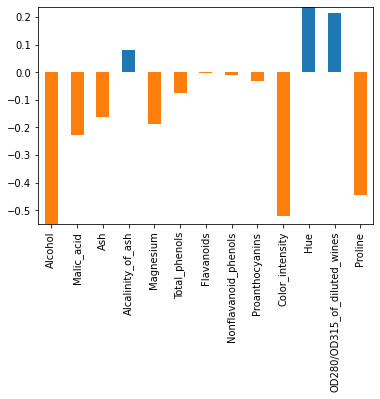

In [235]:
colors_2 = ['C0' if l > 0 else 'C1' for l in loadings_2.loc[1]]
loadings_2.loc[1].plot.bar(color=colors_2, ylim=(loadings_2.loc[1].min(), loadings_2.loc[1].max()))

#### (c) (5 pontos) Para o terceiro componente

<AxesSubplot:>

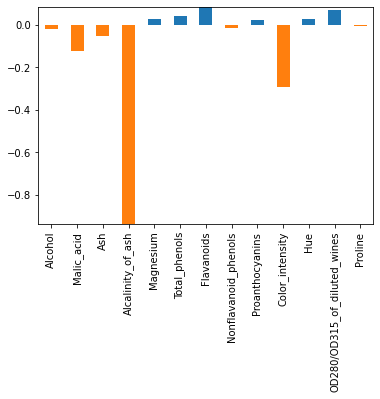

In [237]:
colors = ['C0' if l > 0 else 'C1' for l in loadings_1.loc[2]]
loadings_1.loc[2].plot.bar(color=colors, ylim=(loadings_1.loc[2].min(), loadings_1.loc[2].max()))

<AxesSubplot:>

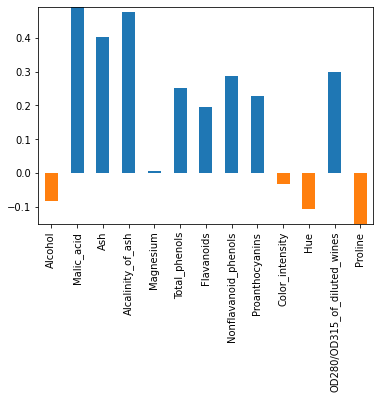

In [236]:
colors_2 = ['C0' if l > 0 else 'C1' for l in loadings_2.loc[2]]
loadings_2.loc[2].plot.bar(color=colors_2, ylim=(loadings_2.loc[2].min(), loadings_2.loc[2].max()))

#### (d) (5 pontos) Para o quarto componente

<AxesSubplot:>

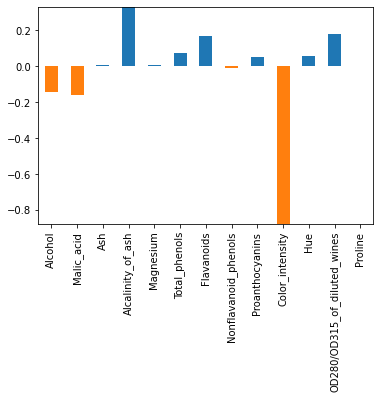

In [238]:
colors = ['C0' if l > 0 else 'C1' for l in loadings_1.loc[3]]
loadings_1.loc[3].plot.bar(color=colors, ylim=(loadings_1.loc[3].min(), loadings_1.loc[3].max()))

<AxesSubplot:>

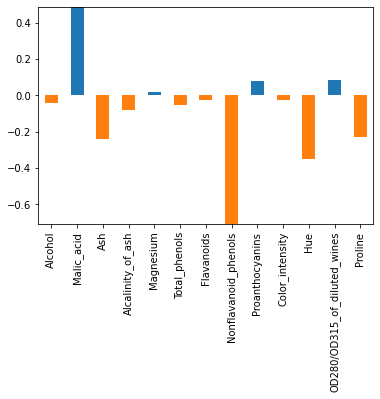

In [239]:
colors_2 = ['C0' if l > 0 else 'C1' for l in loadings_2.loc[3]]
loadings_2.loc[3].plot.bar(color=colors_2, ylim=(loadings_2.loc[3].min(), loadings_2.loc[3].max()))

#### (e) (5 pontos) Para o quinto componente

<AxesSubplot:>

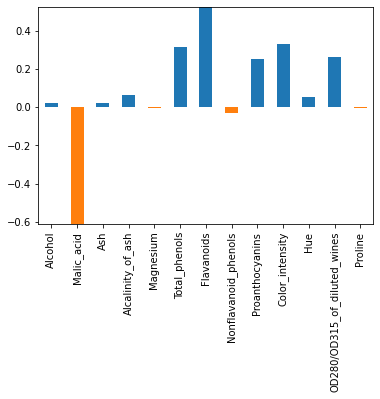

In [241]:
colors = ['C0' if l > 0 else 'C1' for l in loadings_1.loc[4]]
loadings_1.loc[4].plot.bar(color=colors, ylim=(loadings_1.loc[4].min(), loadings_1.loc[4].max()))

<AxesSubplot:>

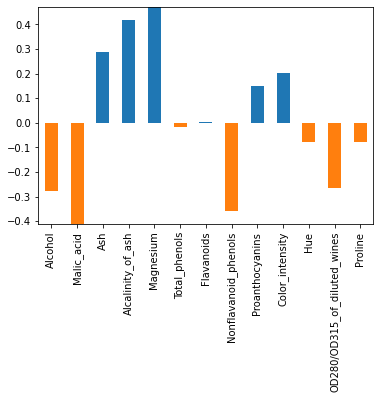

In [240]:
colors_2 = ['C0' if l > 0 else 'C1' for l in loadings_2.loc[4]]
loadings_2.loc[4].plot.bar(color=colors_2, ylim=(loadings_2.loc[4].min(), loadings_2.loc[4].max()))